<a href="https://colab.research.google.com/github/MehmetAltinkurt/DL/blob/main/ASSN2/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

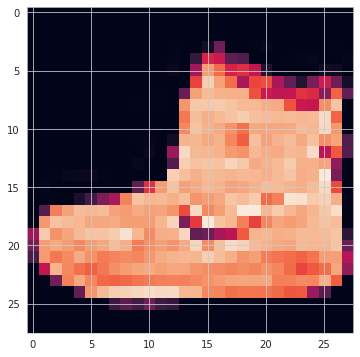

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

9

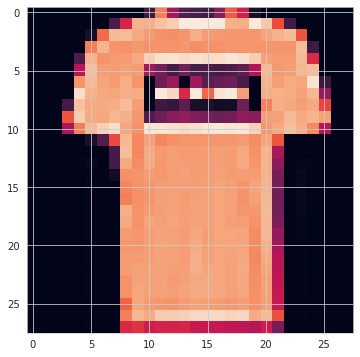

In [ ]:
plt.imshow(x_train[1])

In [ ]:
classes[y_train[1]]

'T-shirt/top'

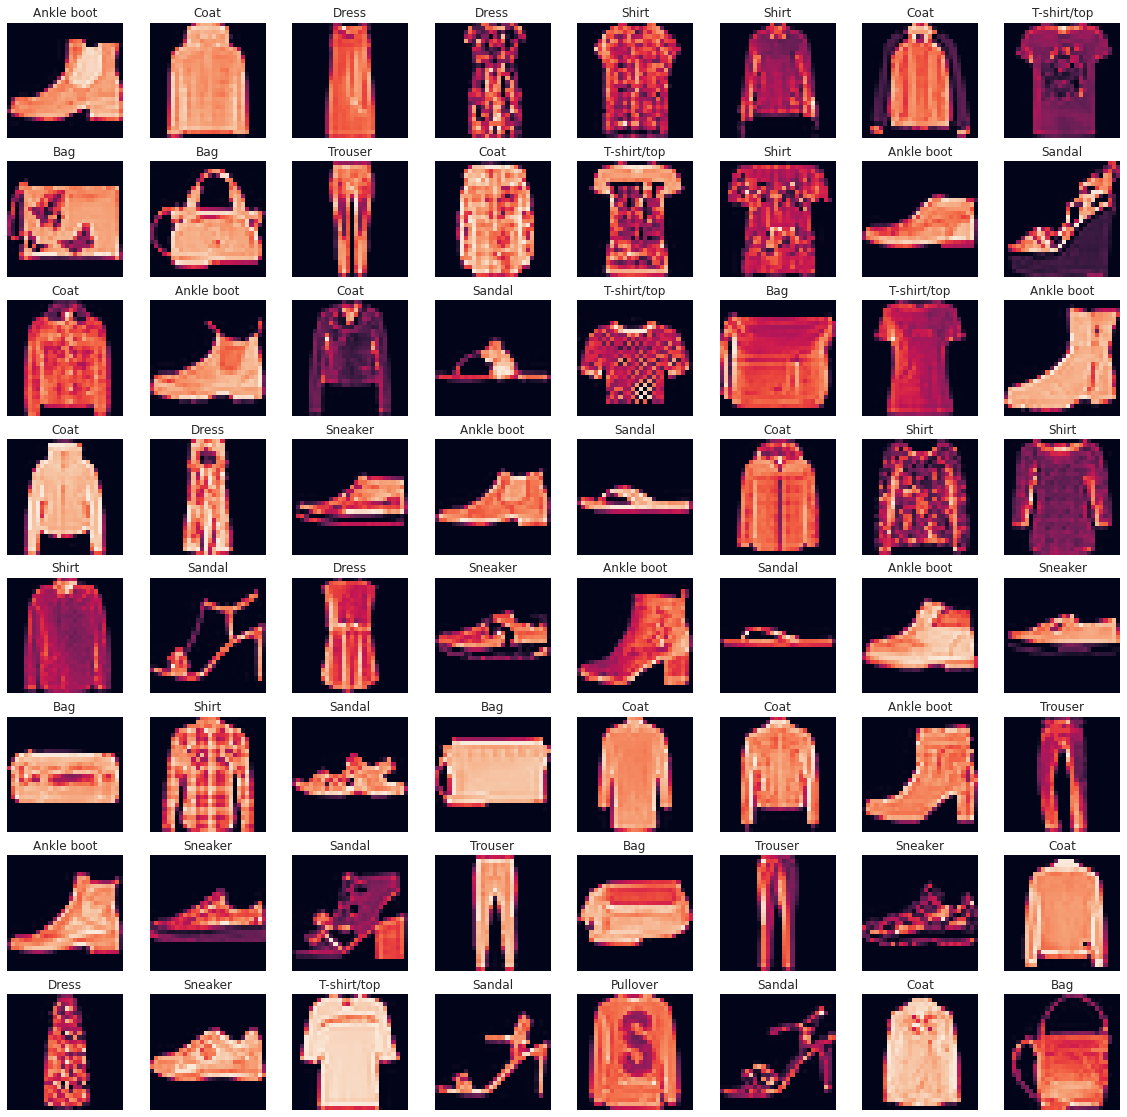

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509805, 0.7372549 , 0.6745098 , 0.5176471 , 0.49019608,
        0.5529412 , 0.78039217, 0.56078434, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843138, 0.5137255 , 0.78039217, 0.80784315,
        0.76862746, 0.7921569 , 0.9490196 , 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254903, 0.80784315, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.13725491, 0.8392157 , 0.7490196 , 0.7176471 , 0.69803923,
        0.6862745 , 0.65882355, 0.5882353 , 0.63529414, 0.62352943,
        0.59607846, 0.6196

In [ ]:
x_train[5].max()

255

In [ ]:
# Normalize image pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509805, 0.7372549 , 0.6745098 , 0.5176471 , 0.49019608,
        0.5529412 , 0.78039217, 0.56078434, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843138, 0.5137255 , 0.78039217, 0.80784315,
        0.76862746, 0.7921569 , 0.9490196 , 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254903, 0.80784315, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.13725491, 0.8392157 , 0.7490196 , 0.7176471 , 0.69803923,
        0.6862745 , 0.65882355, 0.5882353 , 0.63529414, 0.62352943,
        0.59607846, 0.6196

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(60000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [ ]:
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [41]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 704,162
Trainable params: 704,162
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [46]:
model.fit(x_train, Y_train, batch_size=32, epochs=100, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3860 - accuracy: 0.8628 - val_loss: 0.3113 - val_accuracy: 0.8871
Epoch 2/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2594 - accuracy: 0.9052 - val_loss: 0.2877 - val_accuracy: 0.8954
Epoch 3/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2178 - accuracy: 0.9194 - val_loss: 0.2613 - val_accuracy: 0.9045
Epoch 4/100
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1863 - accuracy: 0.9317 - val_loss: 0.2525 - val_accuracy: 0.9058
Epoch 5/100
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1586 - accuracy: 0.9418 - val_loss: 0.2581 - val_accuracy: 0.9106
Epoch 6/100
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1363 - accuracy: 0.9499 - val_loss: 0.2570 - val_accuracy: 0.9122


**TASK 7: Plot values of metrics you used in your model.**

In [47]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.386,0.863,0.311,0.887
1,0.259,0.905,0.288,0.895
2,0.218,0.919,0.261,0.905
3,0.186,0.932,0.252,0.906
4,0.159,0.942,0.258,0.911
5,0.136,0.950,0.257,0.912


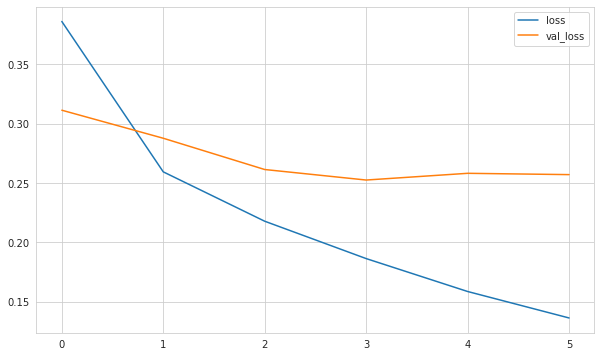

In [48]:
summary[["loss", "val_loss"]].plot();

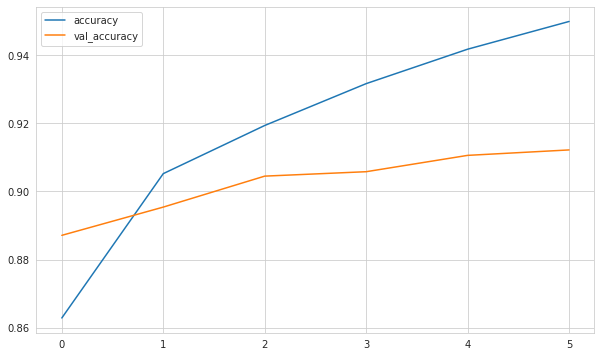

In [49]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [52]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [54]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2525 - accuracy: 0.9058


[0.2524797022342682, 0.9057999849319458]

In [55]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2524797022342682
Test accuracy: 0.9057999849319458


In [57]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 2s 7ms/step


array([[3.8164458e-06, 3.6529528e-09, 2.2577819e-06, ..., 2.4553799e-04,
        8.8130255e-06, 9.9810261e-01],
       [1.4401152e-04, 4.8088204e-11, 9.9977303e-01, ..., 2.9586401e-12,
        1.5371608e-08, 4.1477641e-11],
       [3.1637651e-07, 9.9999958e-01, 1.2736259e-09, ..., 1.8799537e-13,
        5.4644524e-09, 1.2717020e-11],
       ...,
       [3.5444325e-05, 6.7931931e-09, 1.8018105e-05, ..., 9.8653025e-08,
        9.9851120e-01, 1.0910568e-07],
       [1.1423560e-06, 9.9999720e-01, 7.7115354e-09, ..., 6.6211549e-14,
        1.0416601e-09, 3.2450770e-10],
       [5.6428585e-04, 1.4358520e-05, 4.5034313e-03, ..., 3.4118310e-02,
        2.1034986e-02, 1.1247728e-02]], dtype=float32)

In [58]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.83      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.86      0.84      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.69      0.82      0.75      1000
           7       0.98      0.91      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [60]:
print(confusion_matrix(y_test, y_pred))

[[801   0  17  19   3   2 153   0   5   0]
 [  0 983   0  10   4   0   2   0   1   0]
 [ 13   1 834   7  59   1  84   0   1   0]
 [  7   5   7 923  24   0  32   0   2   0]
 [  1   1  47  26 841   0  84   0   0   0]
 [  0   0   0   0   0 987   0   3   0  10]
 [ 66   0  41  27  40   0 819   0   7   0]
 [  0   0   0   0   0  25   0 909   1  65]
 [  2   1   0   4   2   3   7   1 980   0]
 [  0   0   0   0   0   4   1  14   0 981]]


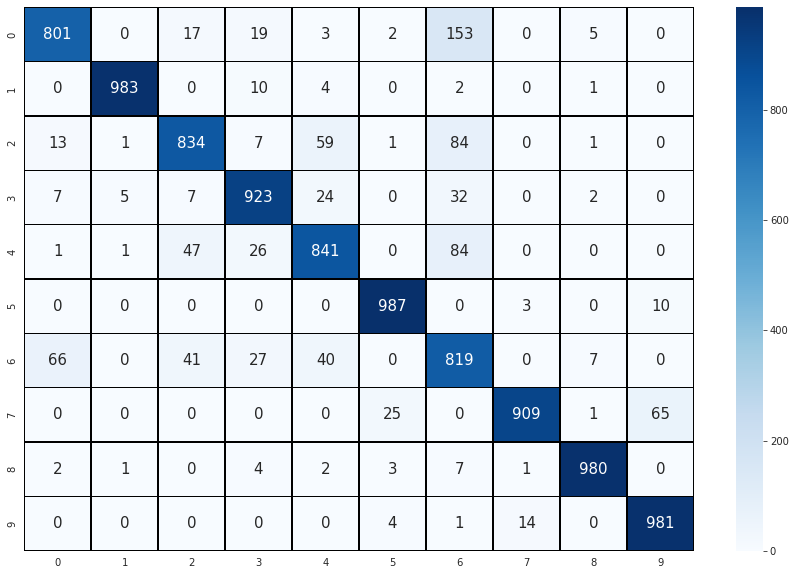

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [62]:
my_number = x_test[3]

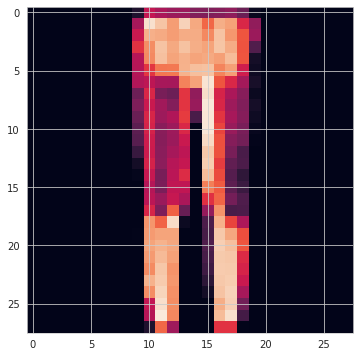

In [63]:
plt.imshow(my_number.reshape(28,28));

In [64]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 34ms/step


array([[2.3700941e-06, 9.9999475e-01, 3.5598957e-09, 1.6540591e-06,
        9.4656184e-07, 1.1158783e-09, 2.1307403e-07, 1.4267380e-12,
        5.7766503e-09, 8.2729290e-10]], dtype=float32)

In [65]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [66]:
model.save("cnn-1.h5")

In [67]:
model=tf.keras.models.load_model('cnn-1.h5')

In [68]:
pred=model.predict(np.expand_dims(x_test[24],axis=0))

1/1 [==============================] - 0s 118ms/step


In [69]:
np.argmax(pred)

1

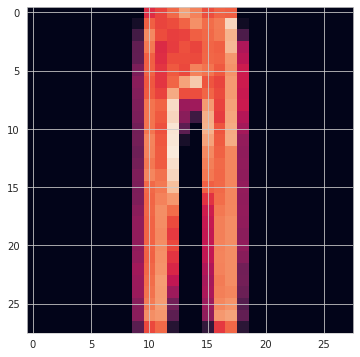

In [71]:
plt.imshow(x_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___